# 股票市场分析


在这个投资组合项目中，我们将研究来自股市的数据，尤其是一些科技股。我们将使用pandas来获取股票信息，可视化它的不同方面，最后，我们将基于以前的表现历史，研究几种分析股票风险的方法。还将通过蒙特卡洛方法预测未来的股票价格。  
  
### 提出问题：  
  
1. 股票价格随时间变化了什么？
2. 股票的平均日收益是多少？
3. 各种股票的移动平均线是多少？
4. 不同股票的收盘价之间有什么关系？
5. 不同股票的每日收益之间有什么关系？
6. 我们通过投资特定股票会给多少价值带来风险？
7. 我们如何尝试预测未来的股票行为？  
---

### Part1 股票信息基本分析  
在本节中，我们将介绍如何处理大熊猫请求的股票信息，以及如何分析股票的基本属性。

In [56]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np 
from pandas_datareader import data as web
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
from __future__ import division

使用Yahoo和pandas来获取一些科技股的数据。

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

#设置数据获取的结束时间和开始时间
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

# 用于获取雅虎财务数据并将其设置为dataframe的循环
for stock in tech_list:   
    # 设置DataFrame为Stock
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)


说明：使用globals（）是设置DataFrame名称的草率方法，但是它很简单。

In [6]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,201.695477,198.033175,199.768253,199.980357,2.934001e+07,198.568456
std,30.033454,30.118819,30.069816,30.181304,1.222335e+07,30.795758
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.085220
25%,177.877499,174.382504,175.572506,175.415001,2.105400e+07,173.832317
50%,201.184998,198.294998,199.579994,199.770004,2.622035e+07,198.249306
75%,216.525002,211.532497,213.937496,213.264996,3.386505e+07,212.626629
max,268.250000,265.899994,267.899994,267.839996,9.574460e+07,267.839996


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-12-04 to 2019-12-04
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


接着绘制近一年股票的数量和收盘价:

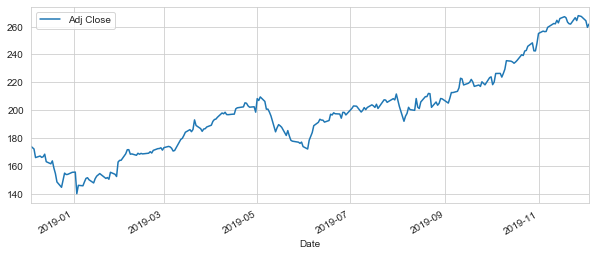

In [57]:
# 绘制过去一年收盘价的历史视图
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

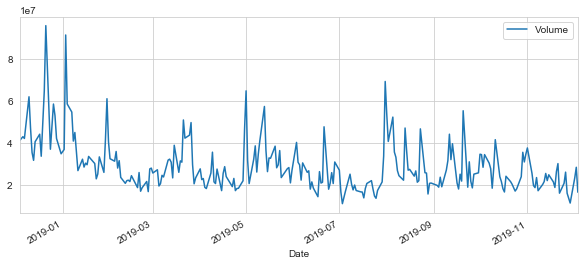

In [58]:
# 绘制过去一年每天交易的股票总量
AAPL['Volume'].plot(legend=True,figsize=(10,4))

现在，我们已经看到了收盘价和每天交易量的可视化，让我们继续计算股票的移动平均线。

In [10]:
# 继续绘制几个移动平均线
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()


现在，继续绘制所有其他移动平均线。

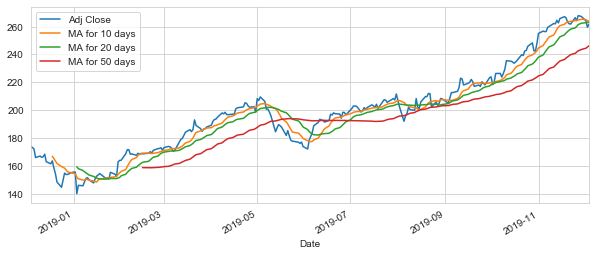

In [59]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))


### Part2 每日收益分析

 现在，我们将分析股票的风险。 为此，我们需要仔细查看股票的每日变化，而不仅仅是其绝对值。 继续使用pandas来获取苹果股票的每日收益。

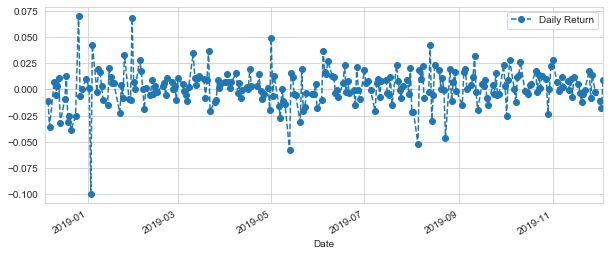

In [60]:
# 使用pct_change得到每天的百分比变化
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# 然后我们将绘制每日收益百分比
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

现在让我们使用直方图全面了解平均每日收益。 我们将使用seaborn在同一图形上创建直方图和kde图。

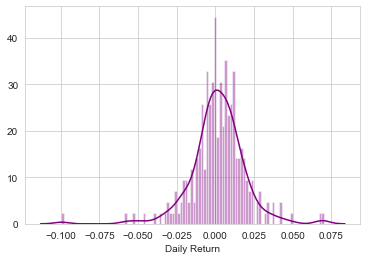

In [61]:
# 使用dropna（），否则seaborn无法读取NaN值
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

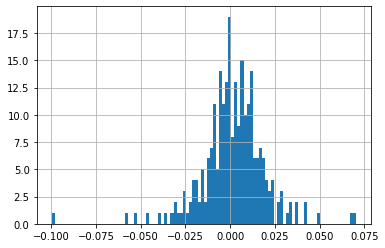

In [14]:
AAPL['Daily Return'].hist(bins=100)

继续为每个股票数据框的所有['Close']列构建一个DataFrame，分析列表中所有股票的收益。

In [15]:
# 将技术股票列表的所有收盘价都收集到一个DataFrame中
closing_df = web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [16]:
closing_df.head()


Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-12-04,174.074539,1668.400024,1050.819946,106.938789
2018-12-06,172.133682,1699.189941,1068.729980,107.599037
2018-12-07,165.995926,1629.130005,1036.579956,103.292702
2018-12-10,167.089478,1641.030029,1039.550049,106.022339
2018-12-11,166.133850,1643.239990,1051.750000,107.007774


现在我们有了所有股票收盘价，继续获取所有股票的每日收益，就像前面为苹果股票所做的那样。

In [28]:
# 建一个新的收益dataframe
tech_rets = closing_df.pct_change()

In [29]:
tech_rets.head()


Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-12-04,NaN,NaN,NaN,NaN
2018-12-06,-0.011150,0.018455,0.017044,0.006174
2018-12-07,-0.035657,-0.041231,-0.030082,-0.040022
2018-12-10,0.006588,0.007305,0.002865,0.026426
2018-12-11,-0.005719,0.001347,0.011736,0.009295


现在，我们可以比较两只股票的每日收益百分比，以检查它们之间的相关性。 首先，让我们看一看与自己相比的股票。

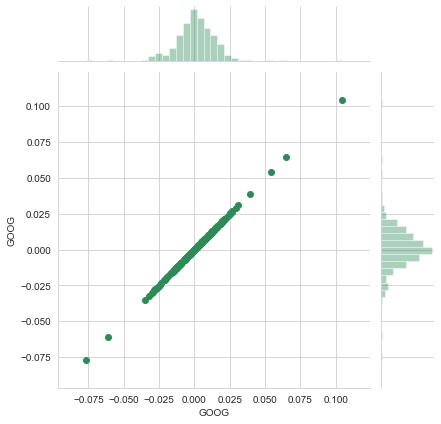

In [62]:
# 将Google与自身进行比较
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

因此，现在我们可以看到，如果两只股票彼此之间具有正相关（正相关），则它们的日收益率之间将存在线性关系。 因此，让我们继续以相同的方式比较Google和Microsoft。

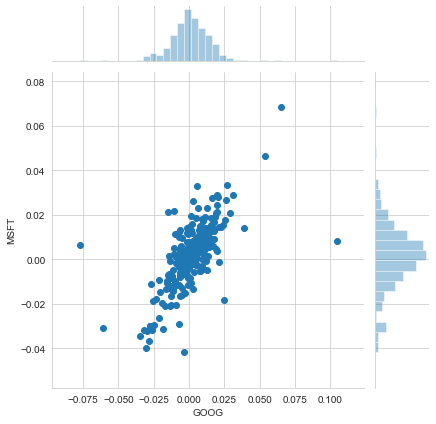

In [63]:
# 使用joinplot比较Google和Microsoft的每日收益
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

pearsonr值（正式称为Pearson乘积矩相关系数）可以了解每日收益百分比的相关性。
  
但是为了快速直观地理解，请查看下面的图片。

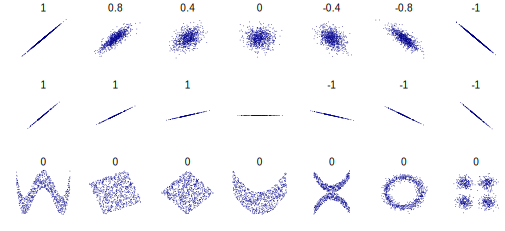

In [83]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn和Pandas使得对我们技术股票行情清单中每种可能的股票组合进行重复比较分析变得非常容易。 我们可以使用sns.pairplot（）自动创建此图。

In [33]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-12-04,NaN,NaN,NaN,NaN
2018-12-06,-0.011150,0.018455,0.017044,0.006174
2018-12-07,-0.035657,-0.041231,-0.030082,-0.040022
2018-12-10,0.006588,0.007305,0.002865,0.026426
2018-12-11,-0.005719,0.001347,0.011736,0.009295


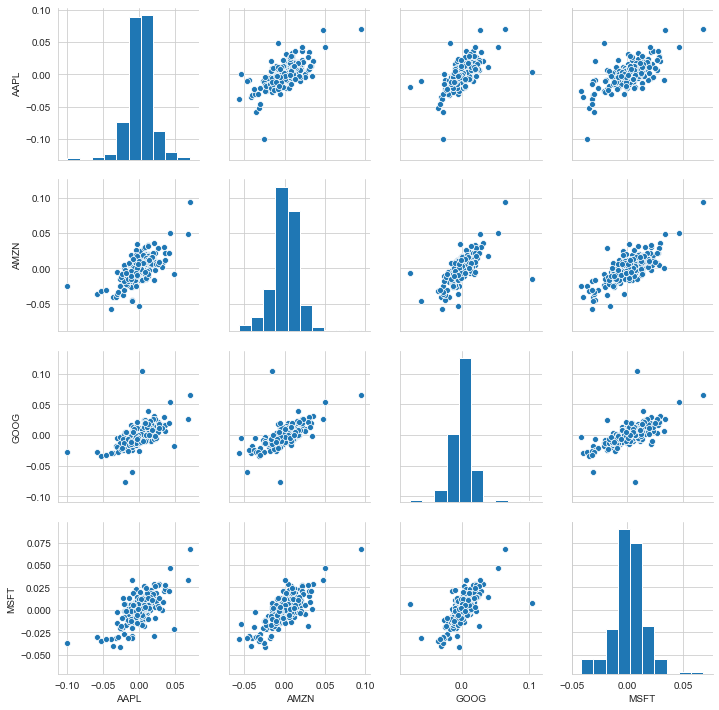

In [64]:
# 可以简单地在DataFrame上调用pairplot，对所有比较进行自动视觉分析
sns.pairplot(tech_rets.dropna())

在上面我们可以看到所有股票之间每日收益的所有关系。我们发现微软和亚马逊的每日回报之间存在有趣的关联。  
  
虽然仅调用sns.pairplot（）的简单性是很好的，但我们也可以使用sns.PairGrid（）来完全控制图形，包括对角线，上三角形和下三角形中的绘图类型。  
  
以下是利用seaborn的全部功能来实现此结果的示例。

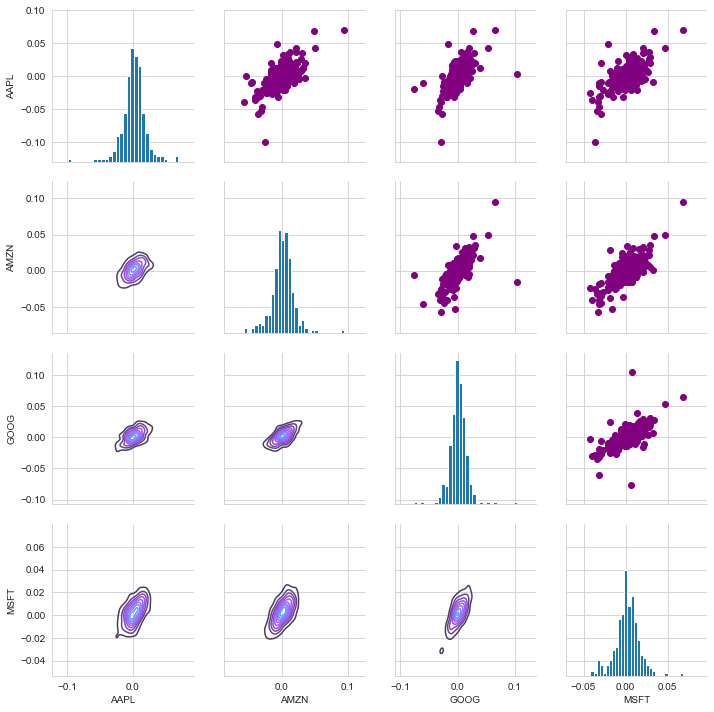

In [65]:
returns_fig = sns.PairGrid(tech_rets.dropna())

# 使用map_upper可以指定上三角形的外观
returns_fig.map_upper(plt.scatter,color='purple')
# 定义图中的下部三角形，包括绘图类型或颜色图
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
# 最后，我们将对角线定义为每日收益的一系列直方图
returns_fig.map_diag(plt.hist,bins=30)


我们也可以使用这种完全相同的技术来分析收盘价的相关性。此处显示，除了调用DataFrame之外，从上面重复了代码。

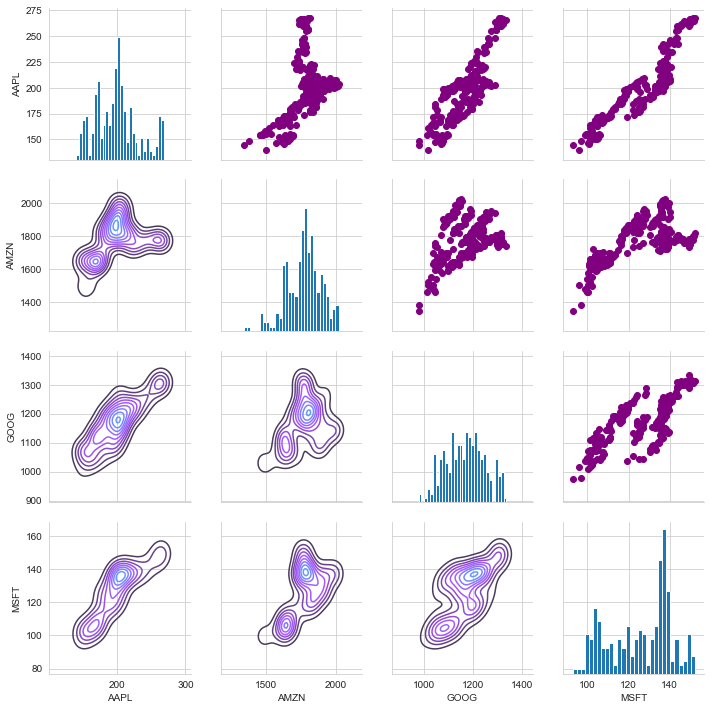

In [66]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)


最后，做一个相关图，以获得股票日收益值之间相关性的实际数值。 通过比较收盘价，我们看到了微软和苹果之间的有趣关系。

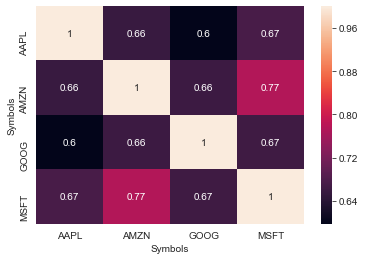

In [82]:
# 利用seaborn绘制每日收益的相关性图
sns.heatmap(tech_rets.dropna().corr(),annot=True)

我们可以看到，亚马逊和微软的每日股票回报率相关性最强。而且，所有技术公司之间都存在正相关。

接下来，我们开始更深入地研究实际风险分析。

### Part3 风险分析

我们可以用多种方法来量化风险，使用我们收集的每日收益百分比信息的最基本方法之一就是将预期收益与每日收益的标准差进行比较。

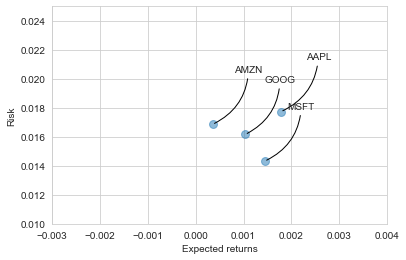

In [74]:
# 让我们首先定义一个新的DataFrame作为原始tech_rets
rets = tech_rets.dropna()
area = np.pi*20
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)
# 设置坐标轴
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])
# 设置绘图轴标题
plt.xlabel('Expected returns')
plt.ylabel('Risk')
# 标记散点图
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3', color = 'black'))

#### 风险价值
我们为股票定义一个风险值参数。我们可以将风险价值视为在给定的置信区间内我们可能期望损失的金额（也就是置于风险中）。  
我们可以使用几种方法来估算风险值。

#### 1. 使用"bootstrap"方法的风险价值  
对于这种方法，我们将根据每日收益的直方图计算经验分位数。  
让我们继续并重复苹果股票的每日收益柱状图。

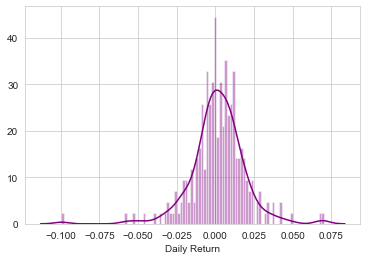

In [70]:
# 注意此处使用dropna（），否则seaborn无法读取NaN值
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

现在我们可以使用分位数来获得股票的风险值。

In [71]:
# 日收益的0.05经验分位数
rets['AAPL'].quantile(0.05)

-0.025151280419423938

日收益的0.05经验分位数为-0.025。这意味着，以95％的置信度，我们最糟糕的每日损失不会超过2.5％。 如果我们有100万美元的投资，那么我们一天的5％风险价值为0.025 * 1,000,000 = 25,000美元。  
  
继续对其他投资组合中的股票重复此操作，然后，我们将通过实施蒙特卡洛方法来评估风险价值。

#### 2. 使用蒙特卡洛（Monte Carlo）方法的风险价值
  
使用蒙特卡洛（Monte Carlo）在随机市场条件下进行许多试验，然后我们将为每个试验计算投资组合损失。此后，我们将使用所有这些模拟的汇总来确定股票的风险程度。  
  
首先简要说明我们将要做的事情：  
  
我们将使用几何布朗运动模型（GBM：Geometric Brownian Motion）。这意味着股票价格随时变动，并且（至少）与有效市场假设（EMH）的弱式相一致：过去的价格信息已经被合并，并且下一个价格走势“有条件地独立于”过去的价格走势。

这意味着过去有关股票价格的信息与股票将来的价格无关，这意味着，我们不能仅根据股票的先前价格来完美地预测未来。

几何布朗运动方程(Geometric Browninan Motion)由以下方程式给出：  
  
$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$
  
其中S是股票价格，mu是预期收益（我们之前已经计算过），sigma是收益的标准偏差，t是时间，epsilon是随机变量。

我们可以将双方乘以股票价格(S)，以重新排列公式并求解股票价格。
  
$$\Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t})$$

现在我们看到股票价格的变化是当前股票价格乘以两个项。第一项称为“drift”，即平均每日收益乘以时间变化，第二个术语称为“shock”。在每个过渡时期，股票都会“drift”，然后经历“shock”，这将随机推动股价上涨或下跌。通过模拟数千次drift和shock的一系列步骤，我们可以开始对股票价格预期的模拟。

为了演示基本的蒙特卡洛方法，我们将从几个模拟开始。首先，我们将使用Google DataFrame “GOOG”定义变量。

In [48]:
# 设定时间范围
days = 365
# 设定delta
dt = 1/days
# 从AAPL的预期收益数据中获取mu(drift) 
mu = rets.mean()['GOOG']
# 从平均收益的std（）获取股票的波动性
sigma = rets.std()['GOOG']

接下来，我们将创建一个函数，该函数包含起始价格和天数，并使用已经计算出的teh sigma和mu形成每日收益。

In [49]:
# 此函数接受起始股票价格，模拟天数，mu，sigma并返回模拟价格数组
def stock_monte_carlo(start_price,days,mu,sigma):
    
    # 定义价格数组
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # 运行天数数组
    for x in range(1,days):
        # 计算 Shock
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        # 计算 Drift
        drift[x] = mu*dt
        # 计算 Price
        price[x] = price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price


In [50]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-04,1104.420044,1049.979980,1103.119995,1050.819946,2345200,1050.819946
2018-12-06,1071.199951,1030.770020,1034.260010,1068.729980,2769200,1068.729980
2018-12-07,1075.260010,1028.500000,1060.010010,1036.579956,2101200,1036.579956
2018-12-10,1048.449951,1023.289978,1035.050049,1039.550049,1807700,1039.550049
2018-12-11,1060.599976,1039.839966,1056.489990,1051.750000,1394700,1051.750000


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

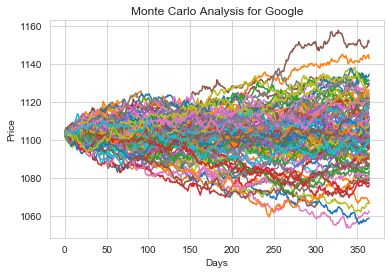

In [72]:
# 从GOOG.head（）获取开始价格
start_price = 1103.12
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')


In [53]:
# 设置大量运行
runs = 10000

# 创建一个空矩阵来保存最终价格数据
simulations = np.zeros(runs)

# 将numpy的print选项设置为仅显示数组中的0-5点以禁止输出
np.set_printoptions(threshold=5)

for run in range(runs):    
    # 将模拟数据点设置为该运行的最后股价
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

现在我们有了一系列的模拟，可以继续绘制直方图，并使用qunatile定义该股票的风险。

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

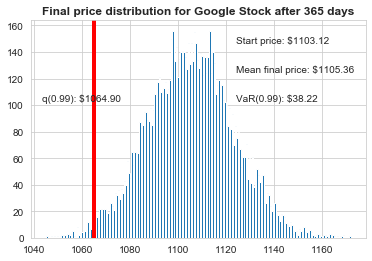

In [73]:
# 将q定义为1％的经验分位数，这基本上意味着99％的值应介于此处
q = np.percentile(simulations, 1)

# 绘制最终价格的分布
plt.hist(simulations,bins=200)

# 使用plt.figtext将一些其他信息填充到绘图中
# 起始价
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# 平均收盘价
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())
# 价格差异（在99％的置信区间内）
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))
# 显示1％的分位数
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# 以1％的分位数结果绘制一条线
plt.axvline(x=q, linewidth=4, color='r')

# 标题
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')

现在，我们看到了最终价格分布的1％经验分位数，以估算Google股票的风险价值，每1103.12美元的投资（一只初始Google股票的价格）看起来就是38.22美元。这基本上意味着，对于购买者购买的每只初始股票，都有99％的可能购买了大约38.22美元的风险股票。